# PTID-CDS-DEC-25-3645
### PRCP-1000-PortugeseBank
### Attribute Information:


#### Bank client data:
- Age (numeric)
- Job : type of job (categorical: 'admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management', 'retired', 'self-employed', 'services', 'student', 'technician', 'unemployed', 'unknown')
- Marital : marital status (categorical: 'divorced', 'married', 'single', 'unknown' ; note: 'divorced' means divorced or widowed)
- Education (categorical: 'basic.4y', 'basic.6y', 'basic.9y', 'high.school', 'illiterate', 'professional.course', 'university.degree', 'unknown')
- Default: has credit in default? (categorical: 'no', 'yes', 'unknown')
- Housing: has housing loan? (categorical: 'no', 'yes', 'unknown')
- Loan: has personal loan? (categorical: 'no', 'yes', 'unknown')

#### Related with the last contact of the current campaign:
- Contact: contact communication type (categorical: 'cellular','telephone')
- Month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
- Day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
- Duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

#### Other attributes:
- Campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
- Pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
- Previous: number of contacts performed before this campaign and for this client (numeric)
- Poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

#### Social and economic context attributes
- Emp.var.rate: employment variation rate - quarterly indicator (numeric)
- Cons.price.idx: consumer price index - monthly indicator (numeric)
- Cons.conf.idx: consumer confidence index - monthly indicator (numeric)
- Euribor3m: euribor 3 month rate - daily indicator (numeric)
- Nr.employed: number of employees - quarterly indicator (numeric)

#### Output variable (desired target):
- y - has the client subscribed a term deposit? (binary: 'yes', 'no')

## Basic Checks


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
bank=pd.read_csv('bank-additional-full.csv',sep=';')
bank

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [ ]:
bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [ ]:
bank.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no


In [ ]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [ ]:
bank.isnull().sum

<bound method DataFrame.sum of          age    job  marital  education  default  housing   loan  contact  \
0      False  False    False      False    False    False  False    False   
1      False  False    False      False    False    False  False    False   
2      False  False    False      False    False    False  False    False   
3      False  False    False      False    False    False  False    False   
4      False  False    False      False    False    False  False    False   
...      ...    ...      ...        ...      ...      ...    ...      ...   
41183  False  False    False      False    False    False  False    False   
41184  False  False    False      False    False    False  False    False   
41185  False  False    False      False    False    False  False    False   
41186  False  False    False      False    False    False  False    False   
41187  False  False    False      False    False    False  False    False   

       month  day_of_week  ...  campaign  pd

In [ ]:
bank.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [ ]:
bank.shape

(41188, 21)

In [ ]:
bank.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [ ]:
bank.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


## 1. Bank client data Analysis and Categorical Treatment

In [ ]:
bank_client = bank.iloc[: , 0:7]
bank_client.head()

,age,job,marital,education,default,housing,loan
0,56,housemaid,married,basic.4y,no,no,no
1,57,services,married,high.school,unknown,no,no
2,37,services,married,high.school,no,yes,no
3,40,admin.,married,basic.6y,no,no,no
4,56,services,married,high.school,no,no,yes


### Knowing the categorical variables:


In [ ]:
print('Jobs:\n',bank_client['job'].unique())
print('Marital:\n', bank_client['marital'].unique())
print('Education:\n', bank_client['education'].unique())
print('Default:\n', bank_client['default'].unique())
print('Housing:\n', bank_client['housing'].unique())
print('Loan:\n', bank_client['loan'].unique())

Jobs:
 ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
Marital:
 ['married' 'single' 'divorced' 'unknown']
Education:
 ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
Default:
 ['no' 'unknown' 'yes']
Housing:
 ['no' 'yes' 'unknown']
Loan:
 ['no' 'yes' 'unknown']


### Exploratory Data Ananlysis (EDA)

### AGE

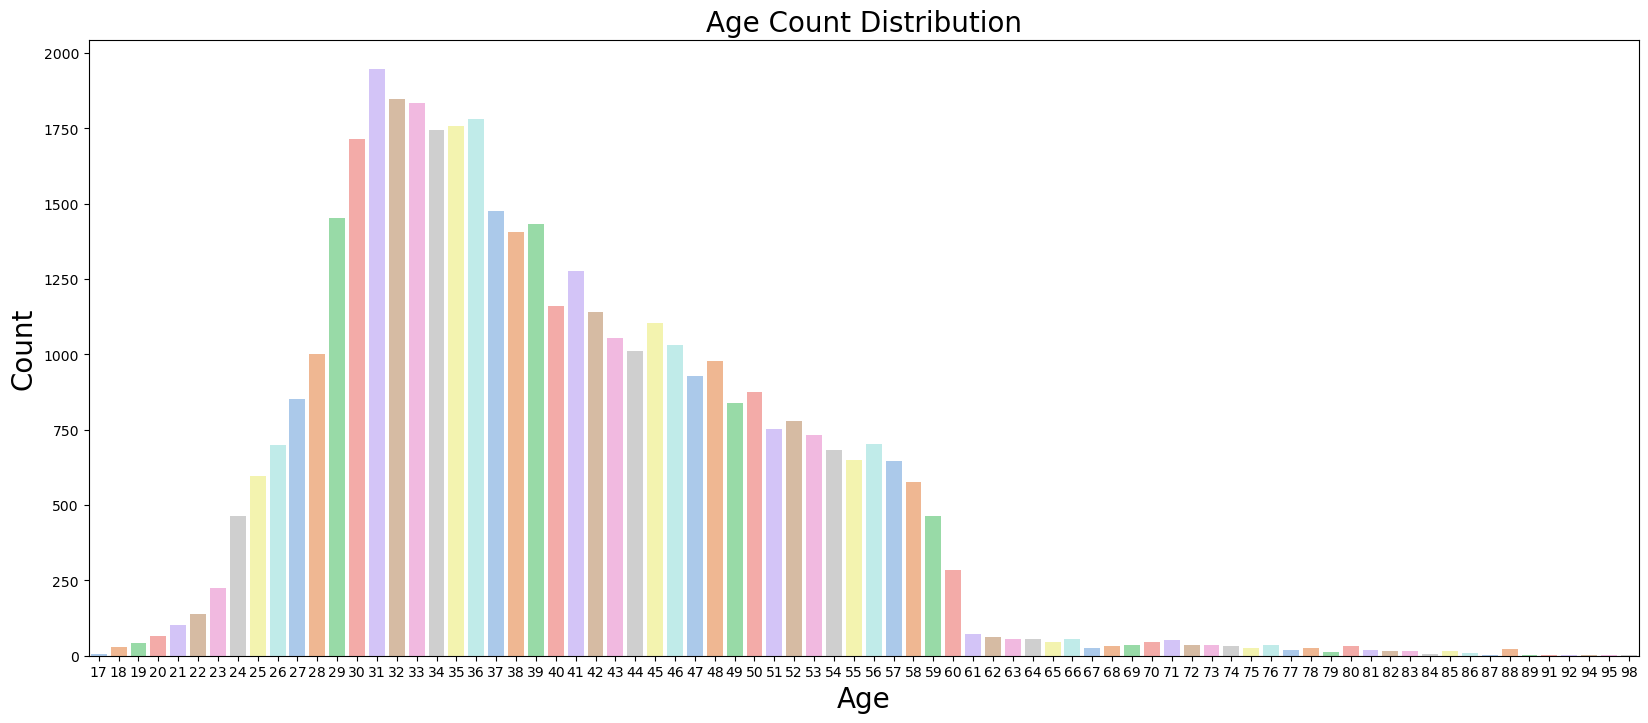

In [ ]:
plt.figure(figsize=(20, 8), facecolor='white')
sns.countplot(x='age', data=bank_client, palette='pastel')  # No need for hue='age'
plt.xlabel('Age', fontsize=20)
plt.ylabel('Count', fontsize=20)
plt.title('Age Count Distribution', fontsize=20)

plt.show()

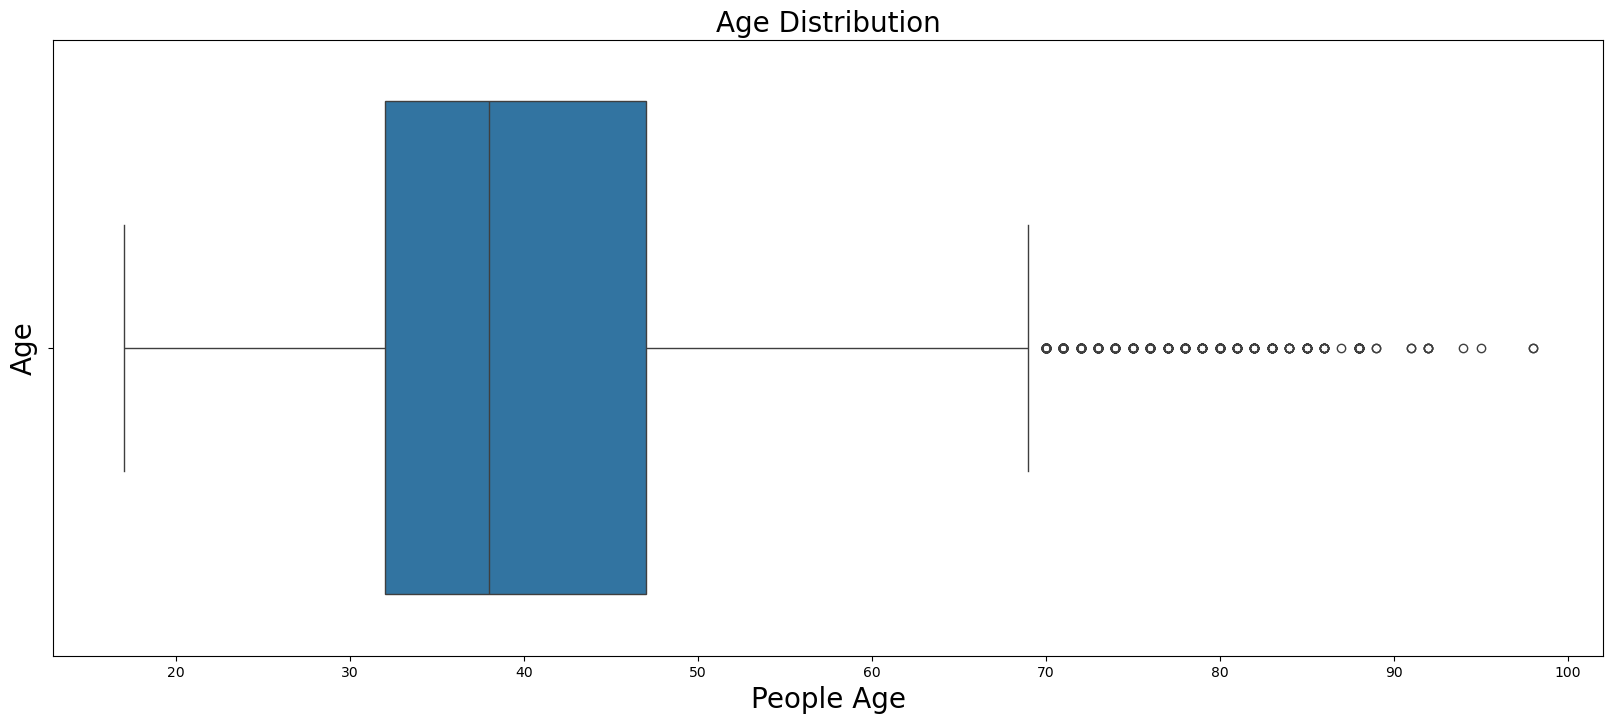

In [ ]:
plt.figure(figsize=(20,8),facecolor='white')
sns.boxplot(x = 'age', data=bank_client)
plt.xlabel('People Age',fontsize=20)
plt.ylabel('Age',fontsize=20)
plt.title('Age Distribution',fontsize=20)


plt.show()

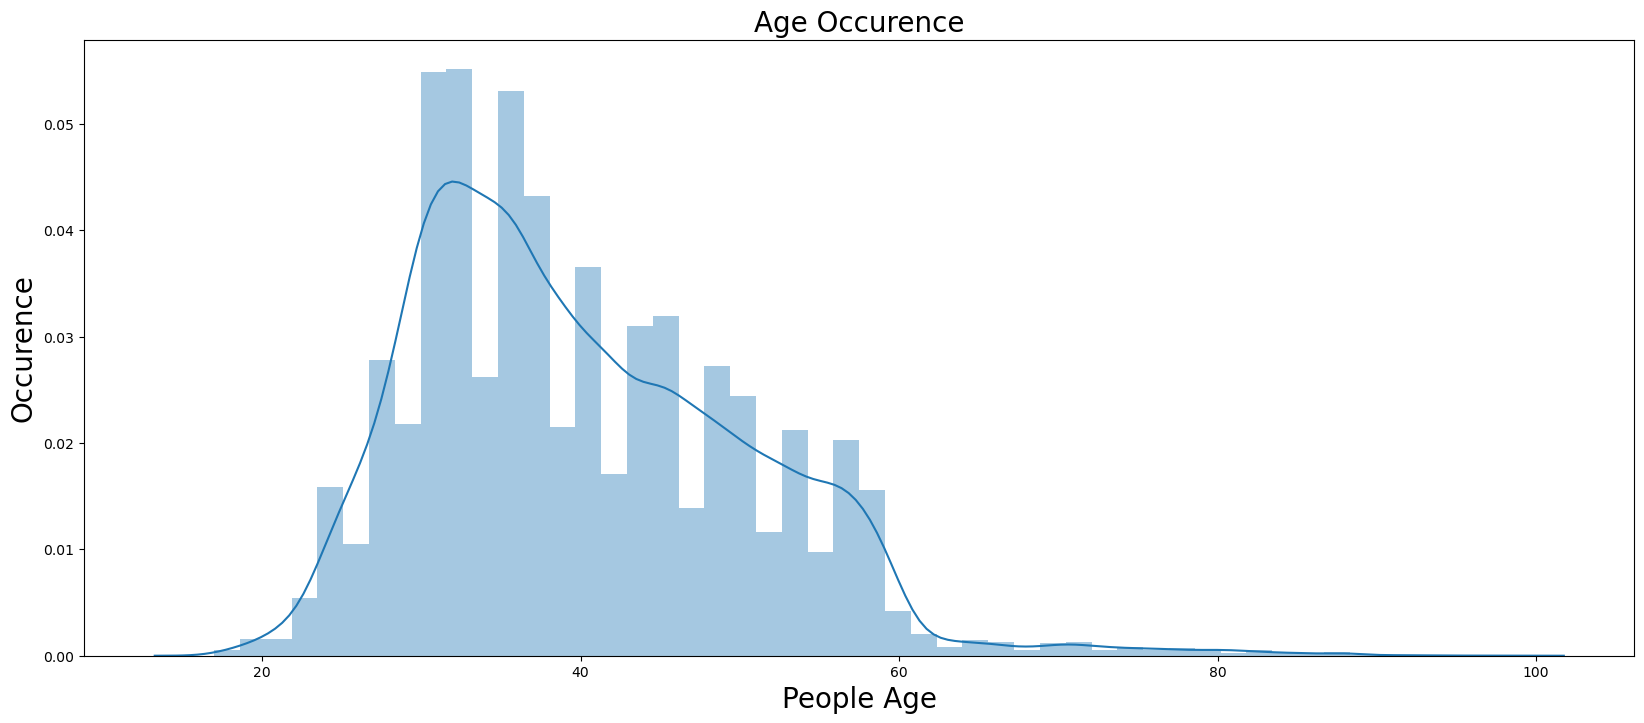

In [ ]:
plt.figure(figsize=(20,8),facecolor='white')
sns.distplot(x=bank_client["age"])
plt.xlabel('People Age',fontsize=20)
plt.ylabel('Occurence',fontsize=20)
plt.title('Age Occurence',fontsize=20)
plt.show()

### MARITAL

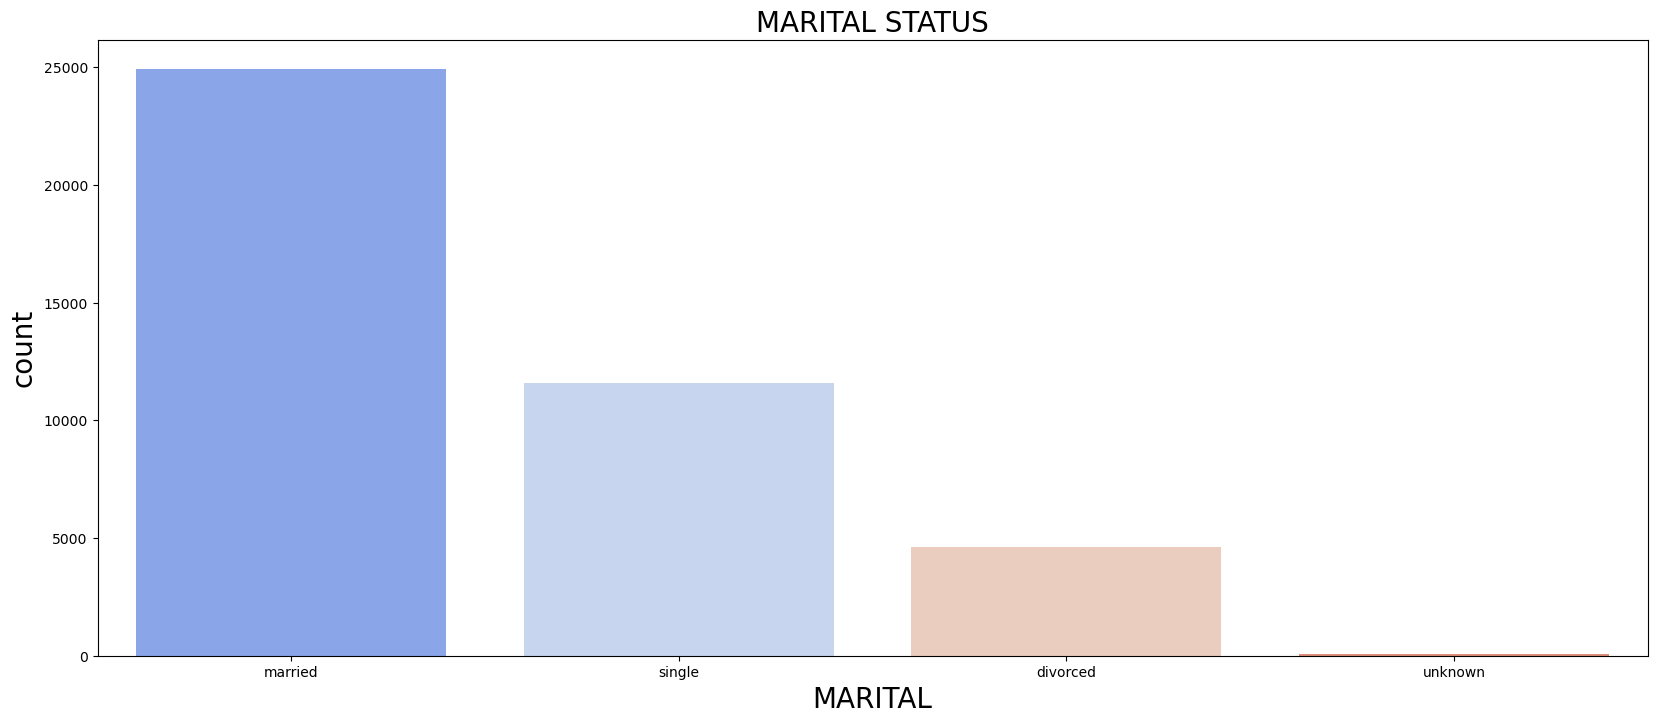

In [ ]:
plt.figure(figsize=(20, 8), facecolor='white')
sns.countplot(x='marital', data = bank_client, palette='coolwarm')
plt.xlabel('MARITAL', fontsize=20)
plt.ylabel('count', fontsize=20)
plt.title('MARITAL STATUS', fontsize=20)

plt.show()

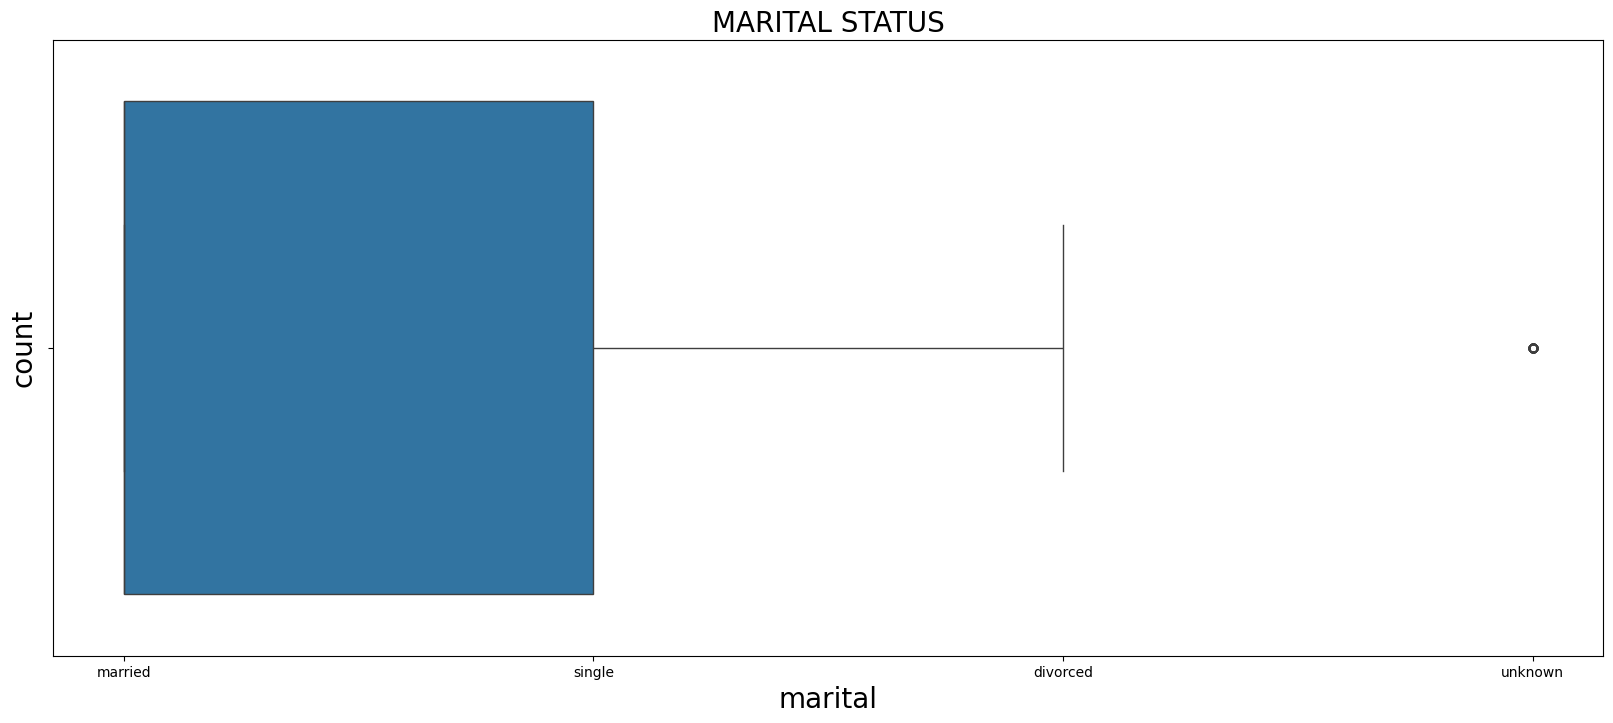

In [ ]:
plt.figure(figsize=(20,8),facecolor='white')
sns.boxplot(x = 'marital', data=bank_client)
plt.xlabel('marital',fontsize=20)
plt.ylabel('count',fontsize=20)
plt.title('MARITAL STATUS',fontsize=20)


plt.show()

### EDUCATION

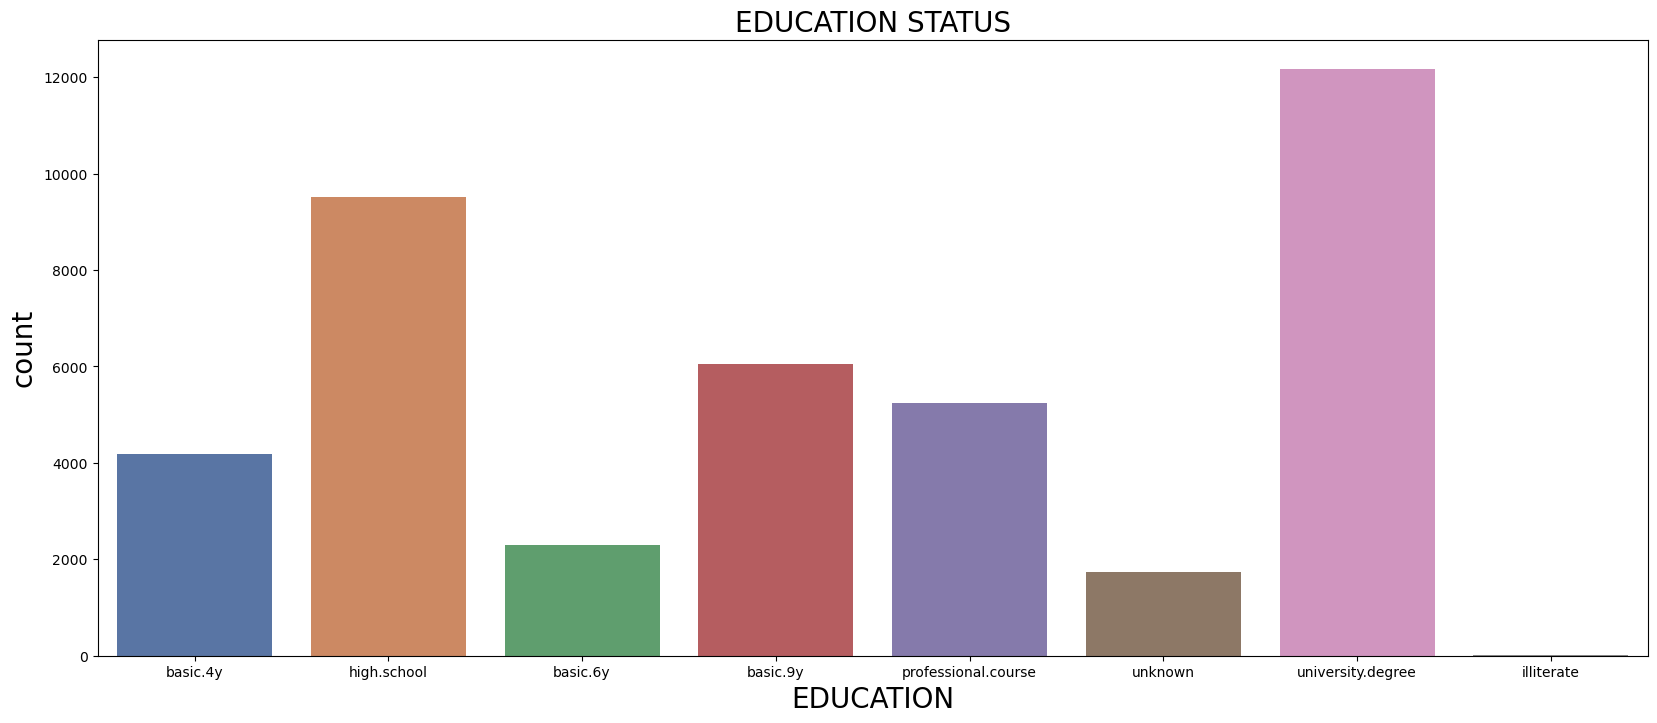

In [ ]:
plt.figure(figsize=(20, 8), facecolor='white')
sns.countplot(x='education', data = bank_client, palette='deep')
plt.xlabel('EDUCATION', fontsize=20)
plt.ylabel('count', fontsize=20)
plt.title('EDUCATION STATUS', fontsize=20)

plt.show()

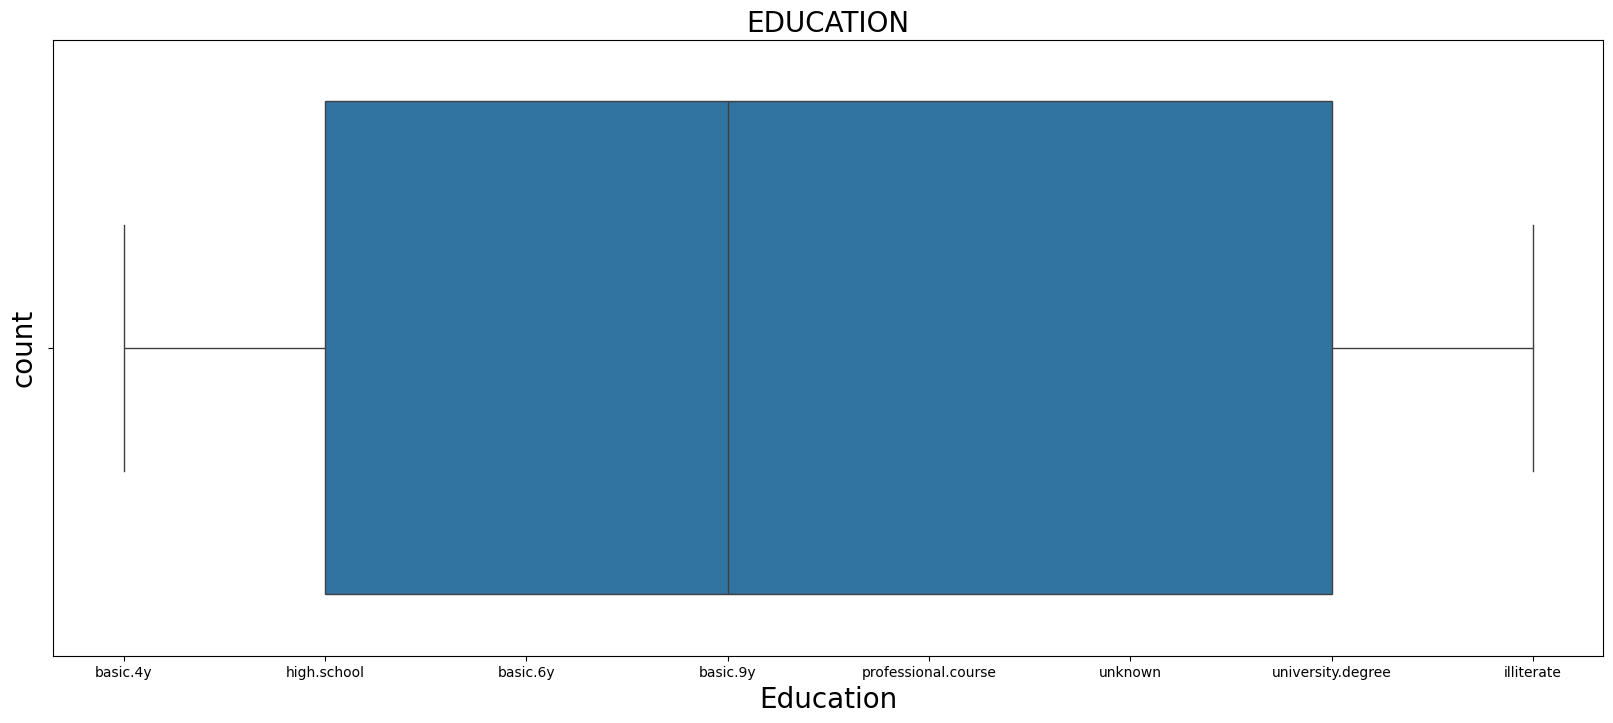

In [ ]:
plt.figure(figsize=(20,8),facecolor='white')
sns.boxplot(x = 'education', data=bank_client)
plt.xlabel('Education',fontsize=20)
plt.ylabel('count',fontsize=20)
plt.title('EDUCATION',fontsize=20)


plt.show()

### DEFAULT

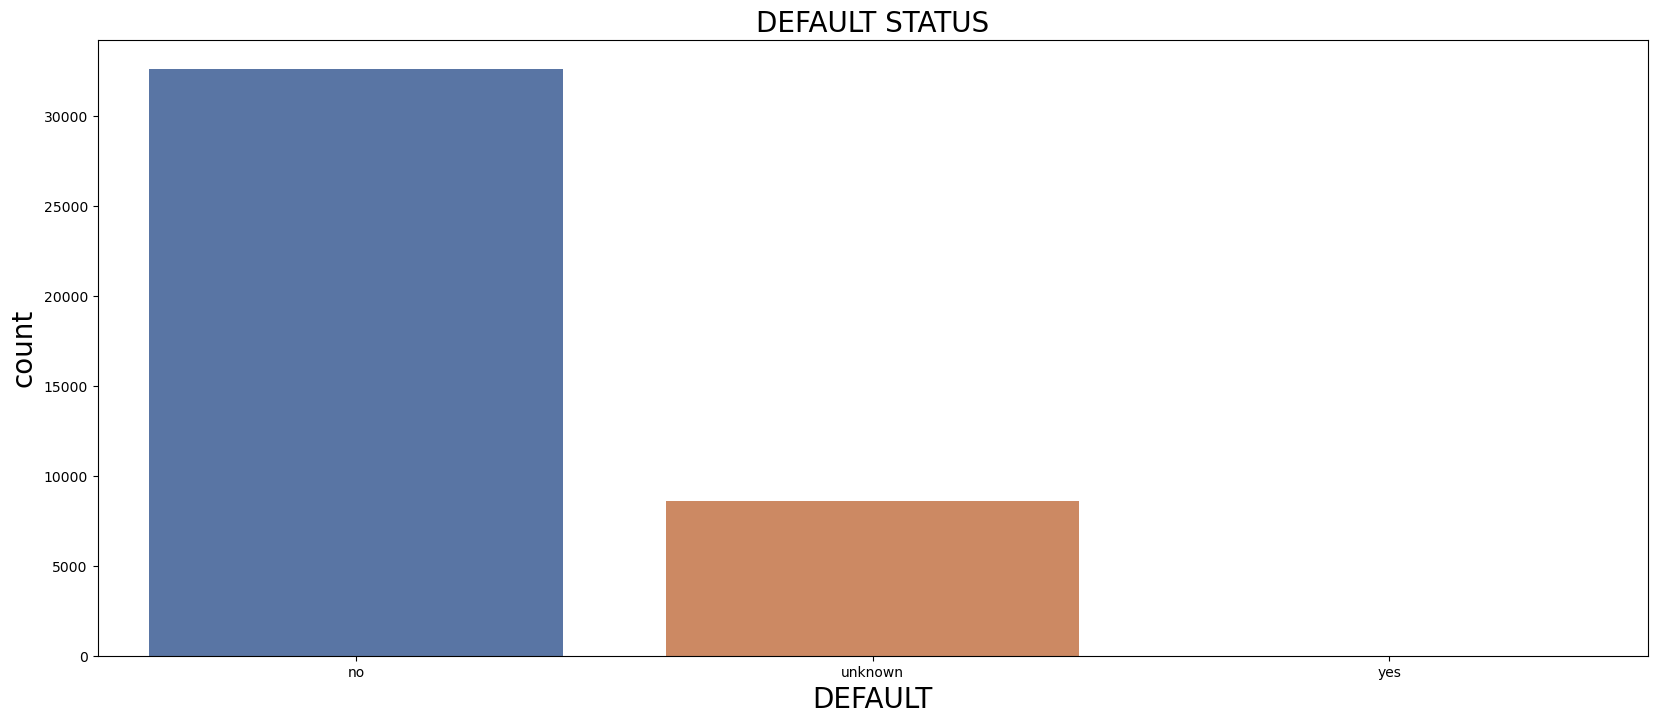

In [ ]:
plt.figure(figsize=(20, 8), facecolor='white')
sns.countplot(x='default', data = bank_client, palette='deep')
plt.xlabel('DEFAULT', fontsize=20)
plt.ylabel('count', fontsize=20)
plt.title('DEFAULT STATUS', fontsize=20)

plt.show()

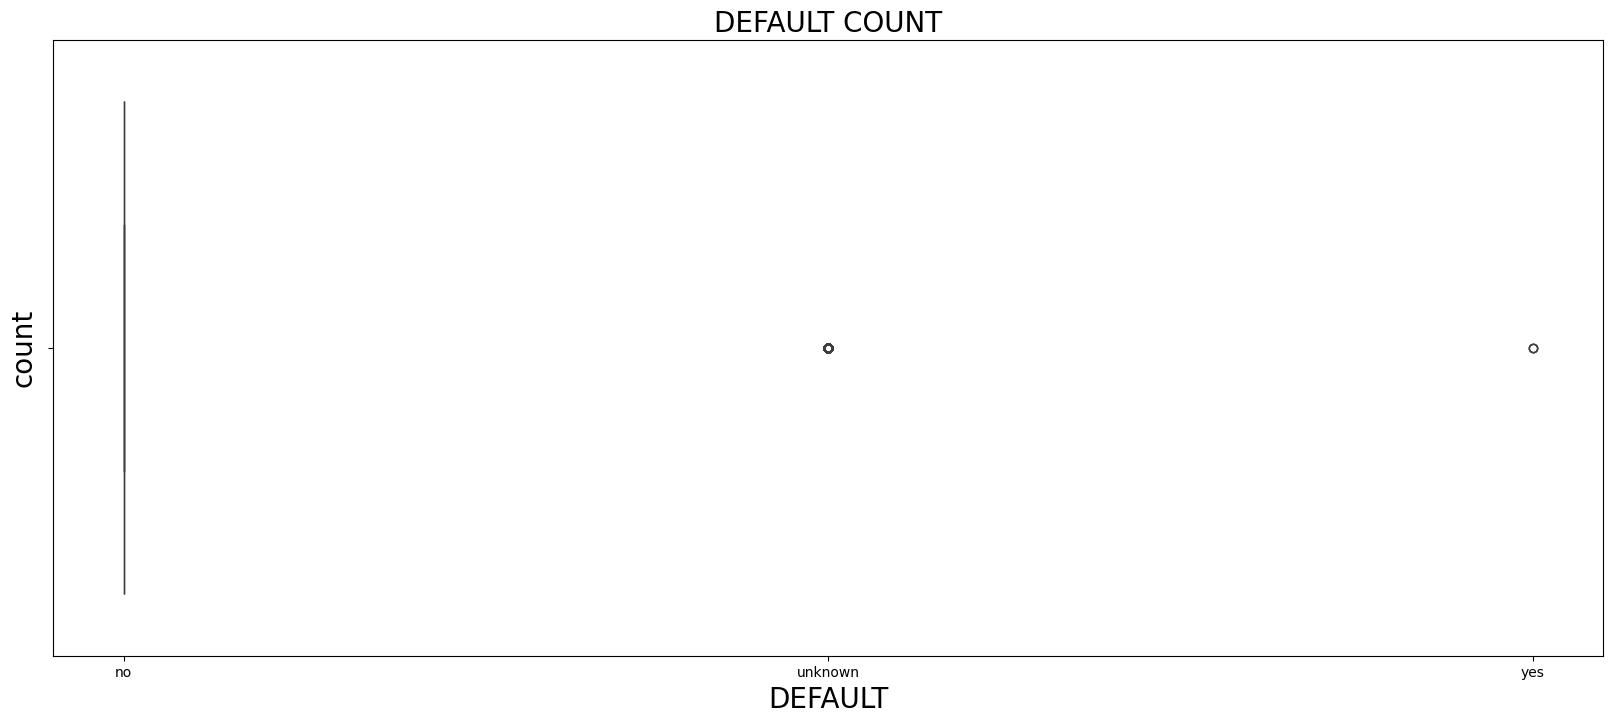

In [ ]:
plt.figure(figsize=(20,8),facecolor='white')
sns.boxplot(x = 'default', data=bank_client)
plt.xlabel('DEFAULT',fontsize=20)
plt.ylabel('count',fontsize=20)
plt.title('DEFAULT COUNT',fontsize=20)


plt.show()

### JOB

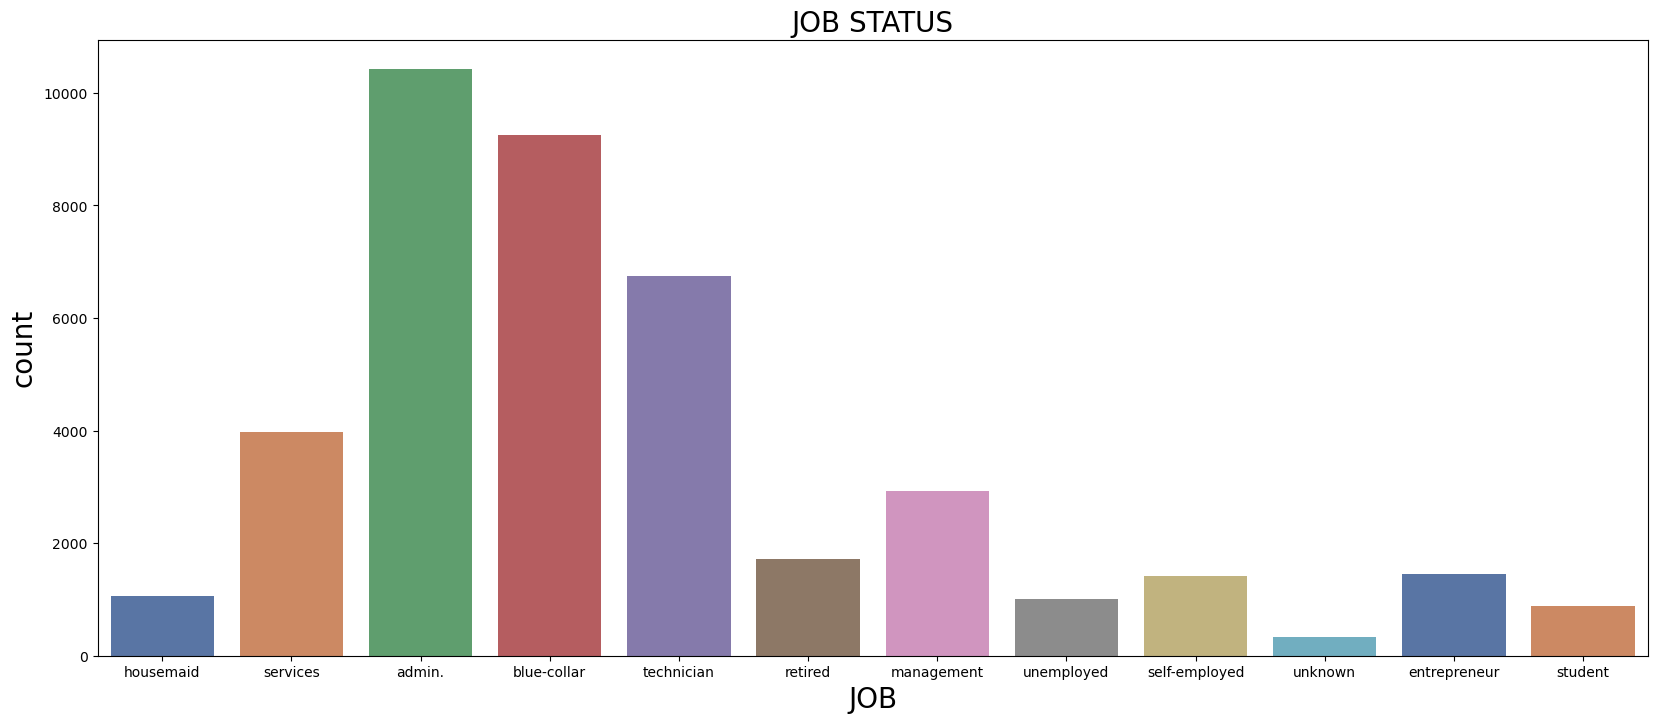

In [ ]:
plt.figure(figsize=(20, 8), facecolor='white')
sns.countplot(x='job', data = bank_client, palette='deep')
plt.xlabel('JOB', fontsize=20)
plt.ylabel('count', fontsize=20)
plt.title('JOB STATUS', fontsize=20)

plt.show()

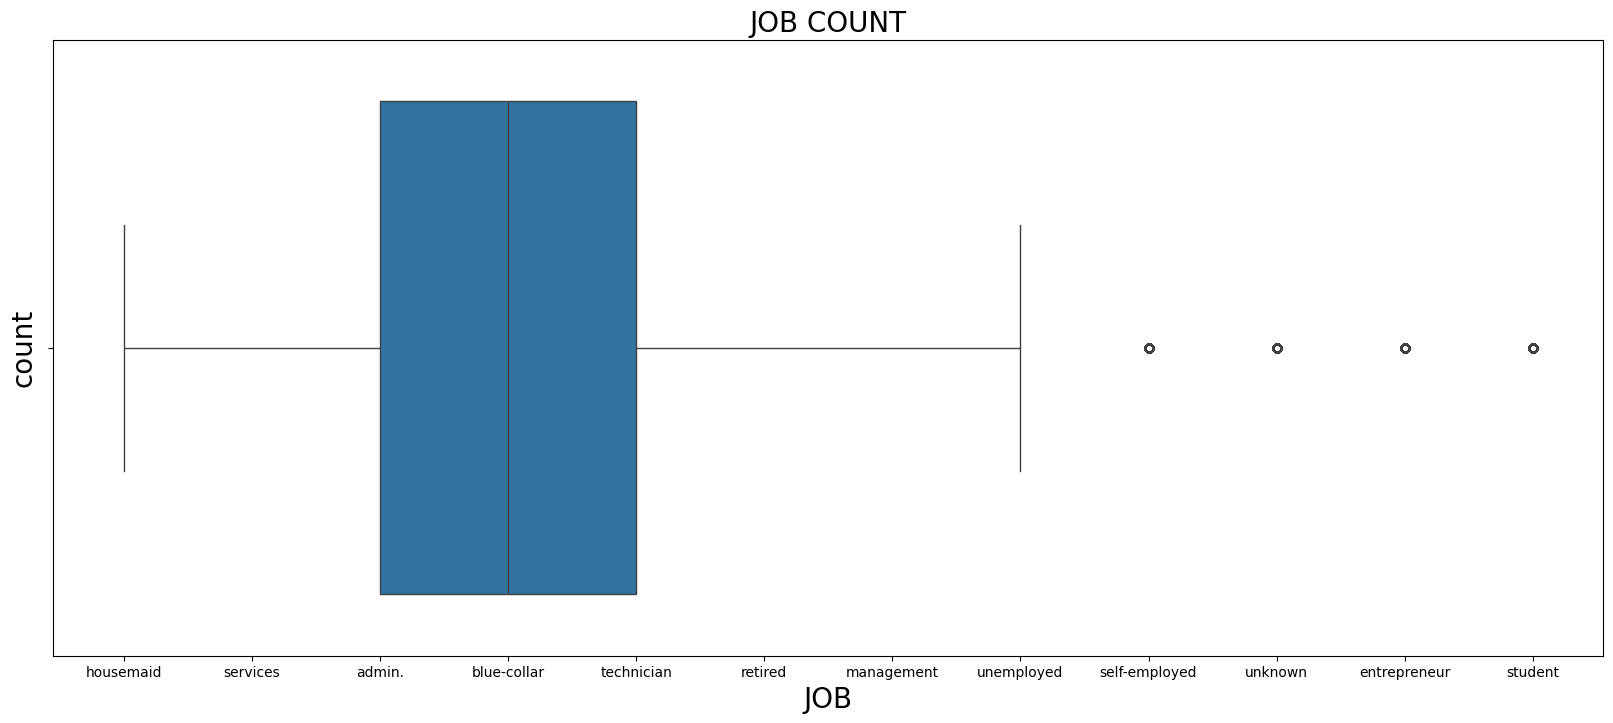

In [ ]:
plt.figure(figsize=(20,8),facecolor='white')
sns.boxplot(x = 'job', data=bank_client)
plt.xlabel('JOB',fontsize=20)
plt.ylabel('count',fontsize=20)
plt.title('JOB COUNT',fontsize=20)


plt.show()

### HOUSING

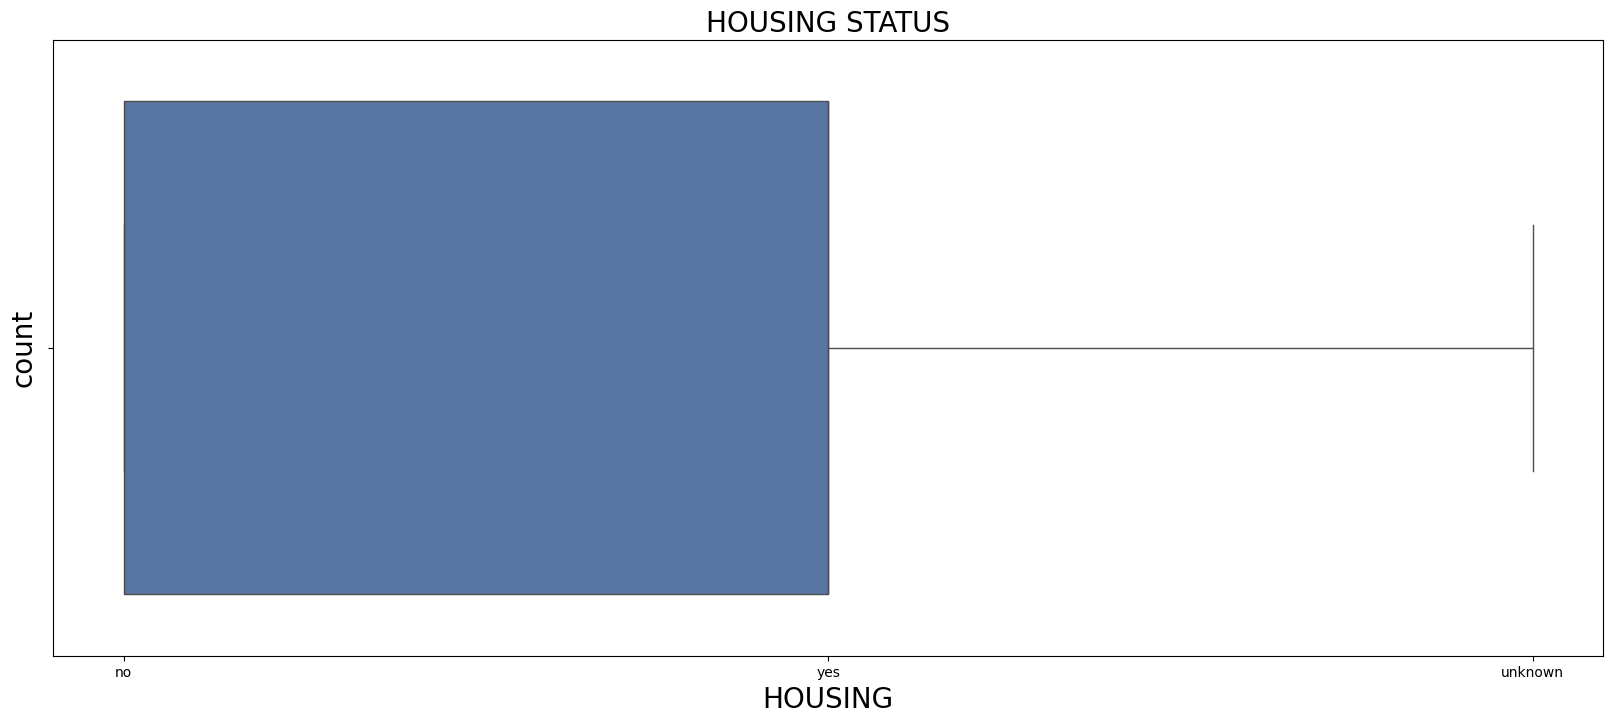

In [ ]:
plt.figure(figsize=(20, 8), facecolor='white')
sns.boxplot(x='housing', data = bank_client, palette='deep')
plt.xlabel('HOUSING', fontsize=20)
plt.ylabel('count', fontsize=20)
plt.title('HOUSING STATUS', fontsize=20)

plt.show()

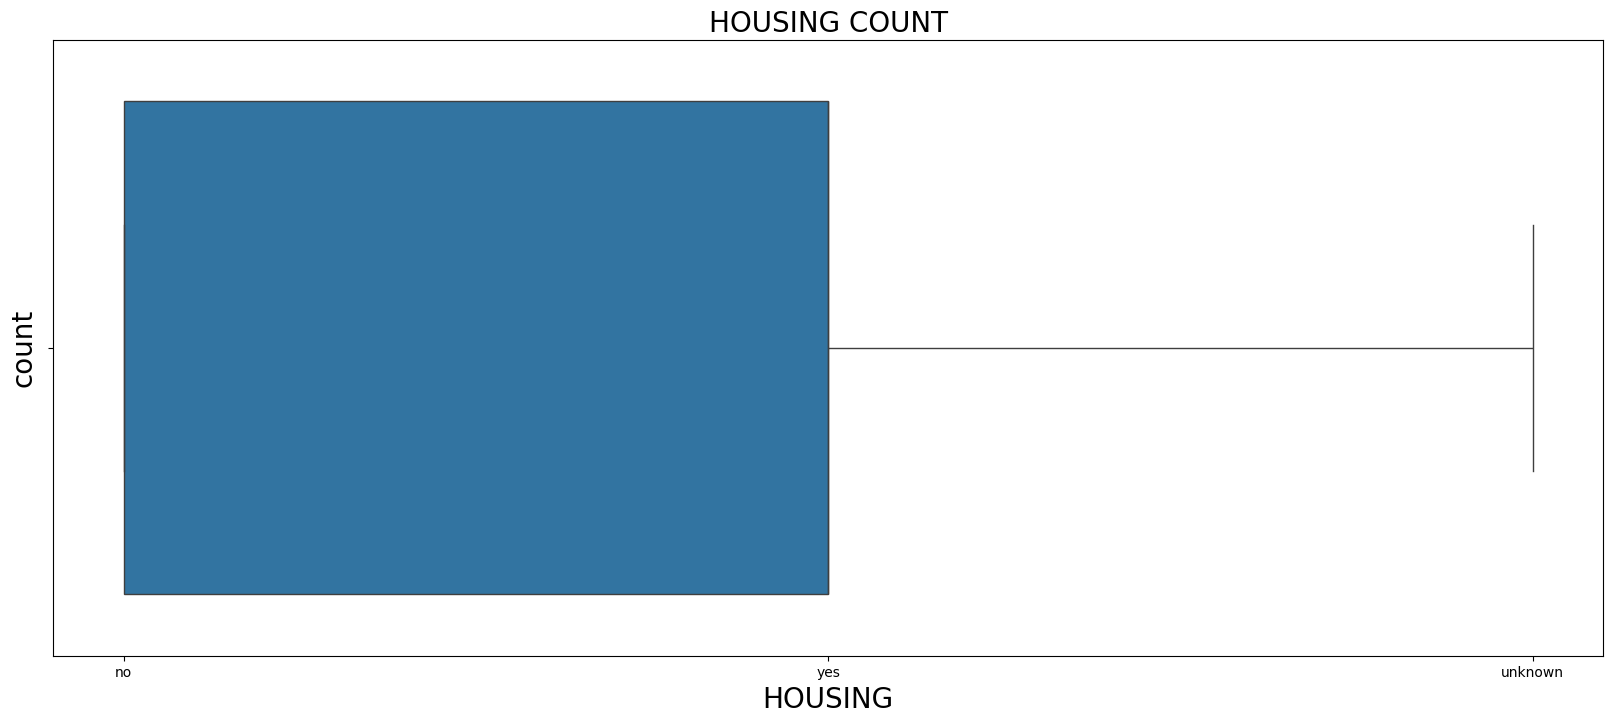

In [ ]:
plt.figure(figsize=(20,8),facecolor='white')
sns.boxplot(x = 'housing', data=bank_client)
plt.xlabel('HOUSING',fontsize=20)
plt.ylabel('count',fontsize=20)
plt.title('HOUSING COUNT',fontsize=20)


plt.show()

### LOAN

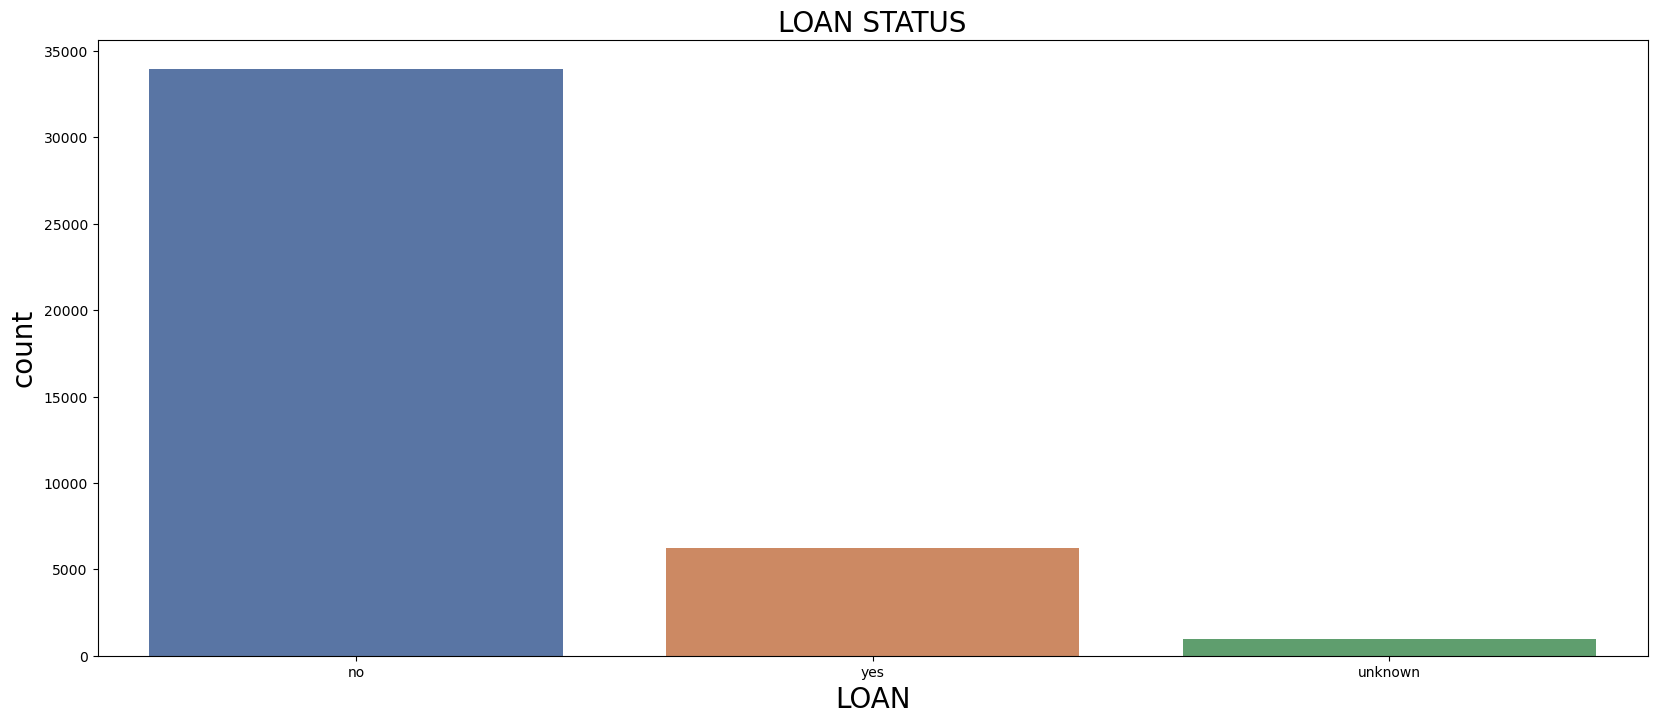

In [ ]:
plt.figure(figsize=(20, 8), facecolor='white')
sns.countplot(x='loan', data = bank_client, palette='deep')
plt.xlabel('LOAN', fontsize=20)
plt.ylabel('count', fontsize=20)
plt.title('LOAN STATUS', fontsize=20)

plt.show()

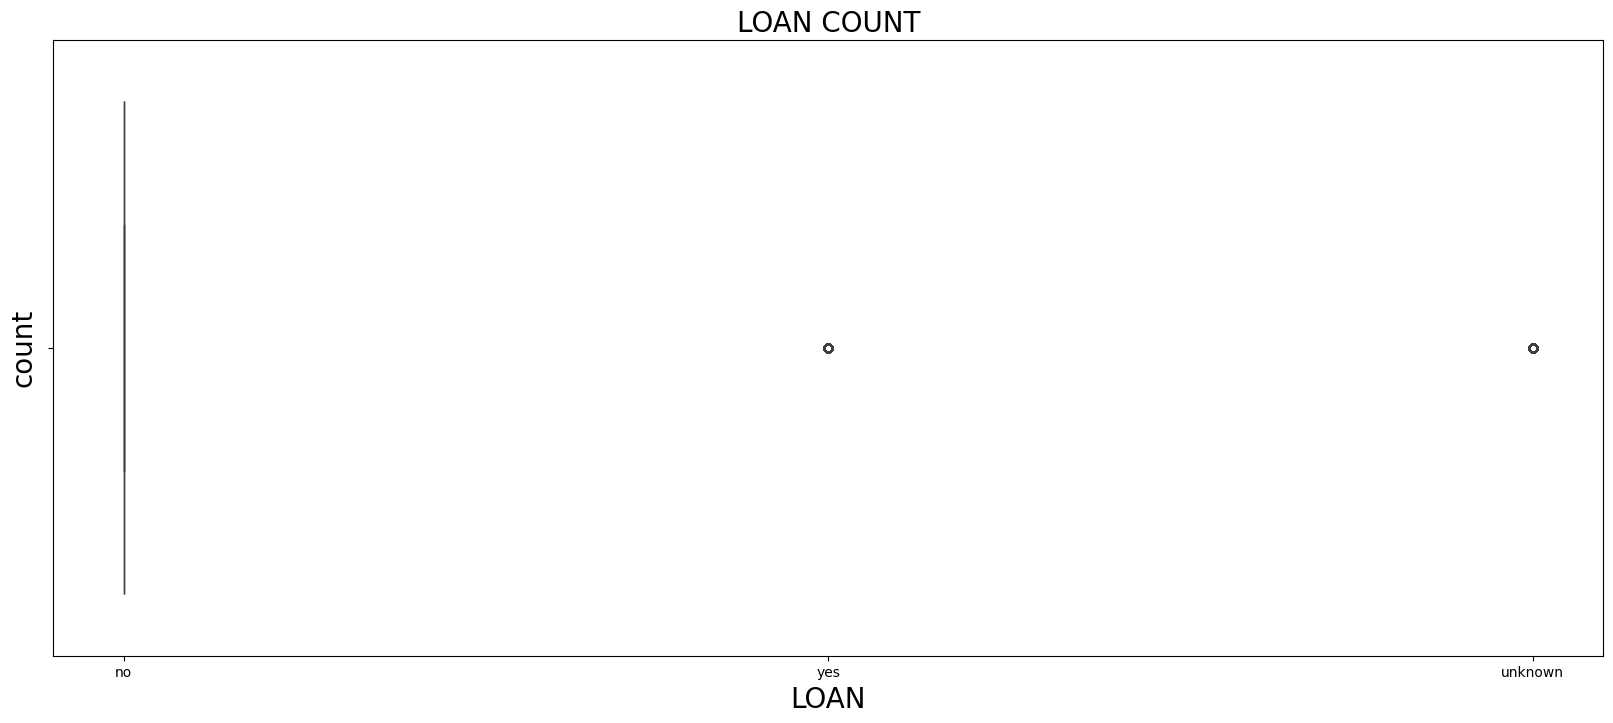

In [ ]:
plt.figure(figsize=(20,8),facecolor='white')
sns.boxplot(x = 'loan', data=bank_client)
plt.xlabel('LOAN',fontsize=20)
plt.ylabel('count',fontsize=20)
plt.title('LOAN COUNT',fontsize=20)


plt.show()

## Outliers Handling

In [ ]:
Q1 = bank_client['age'].quantile(0.25)
Q3 = bank_client['age'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1-1.5*IQR
upper_bound = Q3+1.5*IQR

In [ ]:
lower_bound

9.5

In [ ]:
upper_bound

69.5

In [ ]:
bank_client['age'].mean()

40.02406040594348

In [ ]:
bank_client['age'].std()

10.421249980934235

In [ ]:
bank_client['age'].var()

108.60245116512178

In [ ]:
np.var(bank_client['age'])

108.599814415312

## BANK CLIENTS CONCLUSION


jobs, Marital and Education i think the best analysis is just the count of each variable, if we relate with the other ones its is not conclusive, all this kind of variables has yes, unknown and no for loan, default and housing. Default, loan and housing, its just to see the distribution of people.

### Bank Client Categorical Treatment
- Jobs, Marital, Education, Default, Housing, Loan. Converting to continuous due the feature scaling will be applied later

#### Label Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder
labelencoder_X = LabelEncoder()
bank_client['job']      = labelencoder_X.fit_transform(bank_client['job'])
bank_client['marital']  = labelencoder_X.fit_transform(bank_client['marital'])
bank_client['education']= labelencoder_X.fit_transform(bank_client['education'])
bank_client['default']  = labelencoder_X.fit_transform(bank_client['default'])
bank_client['housing']  = labelencoder_X.fit_transform(bank_client['housing'])
bank_client['loan']     = labelencoder_X.fit_transform(bank_client['loan'])

In [ ]:
bank_client.head()

,age,job,marital,education,default,housing,loan
0,56,3,1,0,0,0,0
1,57,7,1,3,1,0,0
2,37,7,1,3,0,2,0
3,40,0,1,1,0,0,0
4,56,7,1,3,0,0,2


In [ ]:
bank_client.shape

(41188, 7)

### Realted with the last contact of the current campaign

In [ ]:
bank_related = bank.iloc[: , 7:11]
bank_related.head()

,contact,month,day_of_week,duration
0,telephone,may,mon,261
1,telephone,may,mon,149
2,telephone,may,mon,226
3,telephone,may,mon,151
4,telephone,may,mon,307


In [ ]:
bank_related.isnull().sum()

contact        0
month          0
day_of_week    0
duration       0
dtype: int64

In [ ]:
bank_related.isnull().any()

contact        False
month          False
day_of_week    False
duration       False
dtype: bool

In [ ]:
print('contact: \n',bank_related['contact'].unique())
print('\nmonth: \n',bank_related['month'].unique())
print('\nday_of_week: \n',bank_related['day_of_week'].unique())

contact: 
 ['telephone' 'cellular']

month: 
 ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']

day_of_week: 
 ['mon' 'tue' 'wed' 'thu' 'fri']


## 2.1 Duration:

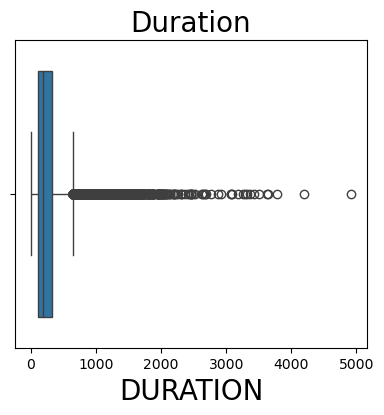

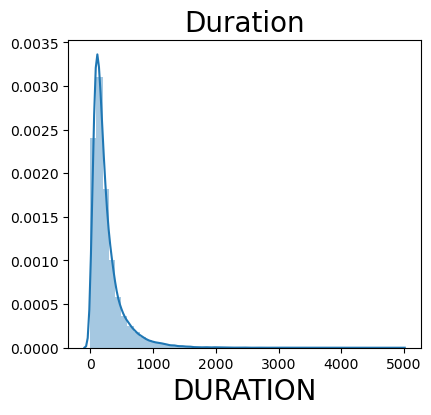

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.figure(figsize=(10,4),facecolor='white')
plt.subplot(1, 2, 1)
sns.boxplot(x = 'duration', data=bank_related)
plt.xlabel('DURATION',fontsize=20)
plt.ylabel('',fontsize=20)
plt.title('Duration',fontsize=20)

plt.show()


plt.figure(figsize=(10,4),facecolor='white')
plt.subplot(1, 2, 2)
sns.distplot(bank_related['duration'])
plt.xlabel('DURATION',fontsize=20)
plt.ylabel('',fontsize=20)
plt.title('Duration',fontsize=20)

plt.show()

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

## outliers handling

In [ ]:
Q1 = bank_related['duration'].quantile(0.25)
Q3 = bank_related['duration'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1-1.5*IQR
upper_bound = Q3+1.5*IQR

In [ ]:
lower_bound

-223.5

In [ ]:
upper_bound

644.5

## If the call duration is iqual to 0, then is obviously that this person didn't subscribed.

In [ ]:
bank[(bank['duration'] == 0)]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
6251,39,admin.,married,high.school,no,yes,no,telephone,may,tue,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
23031,59,management,married,university.degree,no,yes,no,cellular,aug,tue,...,10,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,no
28063,53,blue-collar,divorced,high.school,no,yes,no,cellular,apr,fri,...,3,999,0,nonexistent,-1.8,93.075,-47.1,1.479,5099.1,no
33015,31,blue-collar,married,basic.9y,no,no,no,cellular,may,mon,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.299,5099.1,no


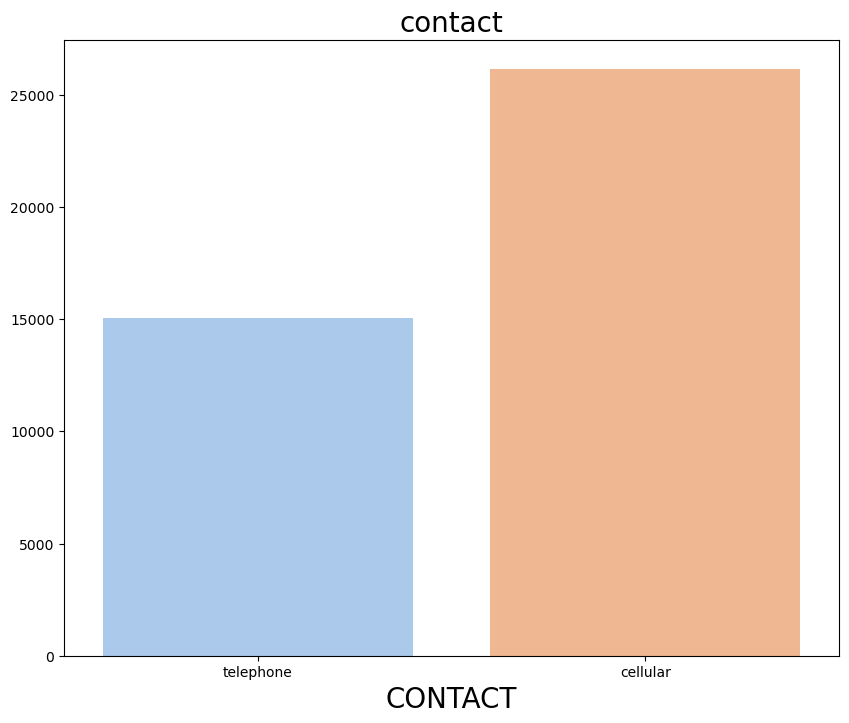

In [ ]:
plt.figure(figsize=(10,8), facecolor='white')
sns.countplot(x='contact', data=bank_related, palette='pastel')  # No need for hue='age'
plt.xlabel('CONTACT', fontsize=20)
plt.ylabel('', fontsize=20)
plt.title('contact', fontsize=20)

plt.show()

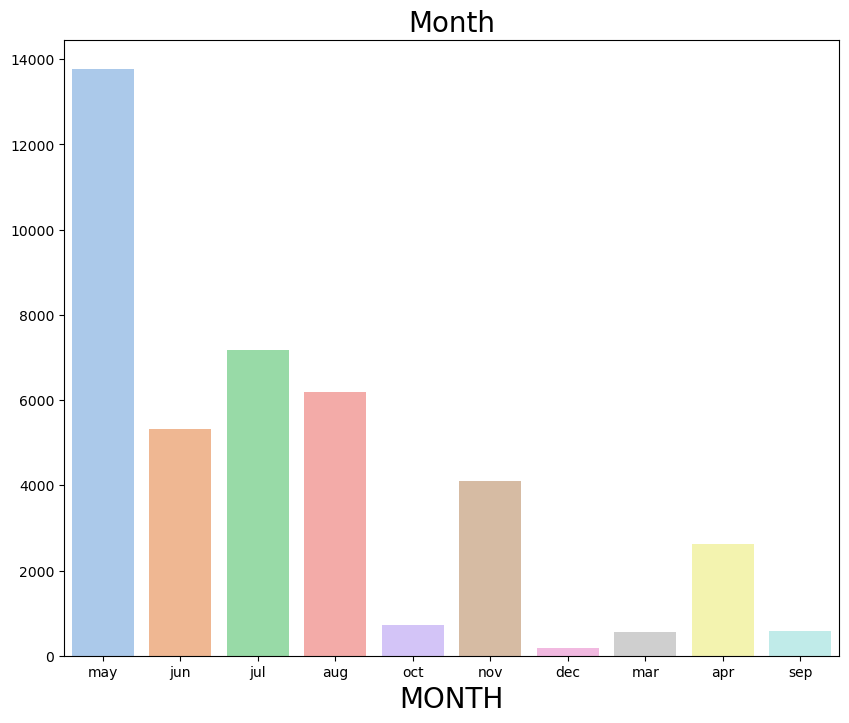

In [ ]:
plt.figure(figsize=(10, 8), facecolor='white')
sns.countplot(x='month', data=bank_related, palette='pastel')  # No need for hue='age'
plt.xlabel('MONTH', fontsize=20)
plt.ylabel('', fontsize=20)
plt.title('Month', fontsize=20)

plt.show()

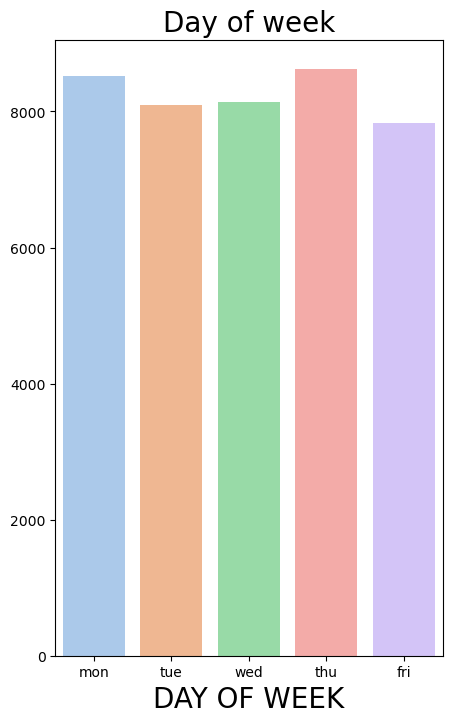

In [ ]:
plt.figure(figsize=(5, 8), facecolor='white')
sns.countplot(x='day_of_week', data=bank_related, palette='pastel')  # No need for hue='age'
plt.xlabel('DAY OF WEEK', fontsize=20)
plt.ylabel('', fontsize=20)
plt.title('Day of week', fontsize=20)

plt.show()

In [ ]:
bank_related[bank_related['duration'] > 640].count()

contact        3008
month          3008
day_of_week    3008
duration       3008
dtype: int64

## 2.1 Contact, Month, Day of Week treatment

In [ ]:
labelencoder_X = LabelEncoder()
bank_related['contact']     = labelencoder_X.fit_transform(bank_related['contact'])
bank_related['month']       = labelencoder_X.fit_transform(bank_related['month'])
bank_related['day_of_week'] = labelencoder_X.fit_transform(bank_related['day_of_week'])

In [ ]:
bank_related.head()

,contact,month,day_of_week,duration
0,1,6,1,261
1,1,6,1,149
2,1,6,1,226
3,1,6,1,151
4,1,6,1,307


## 3.Social and economic context attributes

In [ ]:
bank_se = bank.loc[: , ['emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']]
bank_se.head()

,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,1.1,93.994,-36.4,4.857,5191.0
1,1.1,93.994,-36.4,4.857,5191.0
2,1.1,93.994,-36.4,4.857,5191.0
3,1.1,93.994,-36.4,4.857,5191.0
4,1.1,93.994,-36.4,4.857,5191.0


## 4.Other attributes

In [ ]:
bank_o = bank.loc[: , ['campaign', 'pdays','previous', 'poutcome']]
bank_o.head()

,campaign,pdays,previous,poutcome
0,1,999,0,nonexistent
1,1,999,0,nonexistent
2,1,999,0,nonexistent
3,1,999,0,nonexistent
4,1,999,0,nonexistent


In [ ]:
bank_o['poutcome'].unique()

array(['nonexistent', 'failure', 'success'], dtype=object)

In [ ]:
bank_o['poutcome'].replace(['nonexistent', 'failure', 'success'], [1,2,3], inplace  = True)
bank_o

,campaign,pdays,previous,poutcome
0,1,999,0,1
1,1,999,0,1
2,1,999,0,1
3,1,999,0,1
4,1,999,0,1
...,...,...,...,...
41183,1,999,0,1
41184,1,999,0,1
41185,2,999,0,1
41186,1,999,0,1


## Model

In [ ]:
bank_final= pd.concat([bank_client, bank_related, bank_se, bank_o], axis = 1)
bank_final = bank_final[['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
                     'contact', 'month', 'day_of_week', 'duration', 'emp.var.rate', 'cons.price.idx',
                     'cons.conf.idx', 'euribor3m', 'nr.employed', 'campaign', 'pdays', 'previous', 'poutcome']]
bank_final.shape

(41188, 20)

In [ ]:
bank_final

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,campaign,pdays,previous,poutcome
0,56,3,1,0,0,0,0,1,6,1,261,1.1,93.994,-36.4,4.857,5191.0,1,999,0,1
1,57,7,1,3,1,0,0,1,6,1,149,1.1,93.994,-36.4,4.857,5191.0,1,999,0,1
2,37,7,1,3,0,2,0,1,6,1,226,1.1,93.994,-36.4,4.857,5191.0,1,999,0,1
3,40,0,1,1,0,0,0,1,6,1,151,1.1,93.994,-36.4,4.857,5191.0,1,999,0,1
4,56,7,1,3,0,0,2,1,6,1,307,1.1,93.994,-36.4,4.857,5191.0,1,999,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,5,1,5,0,2,0,0,7,0,334,-1.1,94.767,-50.8,1.028,4963.6,1,999,0,1
41184,46,1,1,5,0,0,0,0,7,0,383,-1.1,94.767,-50.8,1.028,4963.6,1,999,0,1
41185,56,5,1,6,0,2,0,0,7,0,189,-1.1,94.767,-50.8,1.028,4963.6,2,999,0,1
41186,44,9,1,5,0,0,0,0,7,0,442,-1.1,94.767,-50.8,1.028,4963.6,1,999,0,1


In [ ]:
y = pd.get_dummies(bank['y'], columns = ['y'], prefix = ['y'], drop_first = True)
bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


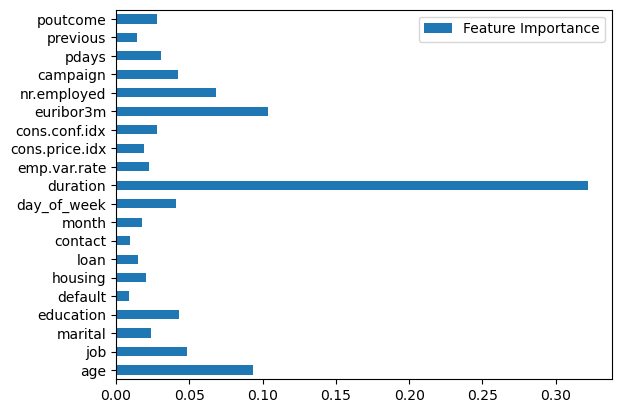

In [ ]:
from sklearn.ensemble import RandomForestClassifier
pd.DataFrame(data = RandomForestClassifier().fit(bank_final,y).feature_importances_,index=bank_final.columns
             ,columns=['Feature Importance']).plot.barh();

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(bank_final, y, test_size = 0.2, random_state = 101)

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

In [ ]:
X_train.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,campaign,pdays,previous,poutcome
39577,79,5,1,2,0,0,0,0,6,3,104,-1.8,93.876,-40.0,0.668,5008.7,1,999,2,2
10104,54,9,1,6,0,2,0,1,4,2,394,1.4,94.465,-41.8,4.958,5228.1,1,999,0,1
17235,36,7,1,3,0,0,0,0,3,0,468,1.4,93.918,-42.7,4.962,5228.1,4,999,0,1
20926,32,0,2,6,0,2,0,0,1,2,605,1.4,93.444,-36.1,4.964,5228.1,1,999,0,1
17626,52,2,1,2,0,2,0,0,3,1,165,1.4,93.918,-42.7,4.962,5228.1,5,999,0,1


## Scaling:

In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc_X = MinMaxScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [ ]:
X_train

array([[0.7654321 , 0.45454545, 0.33333333, ..., 1.        , 0.28571429,
        0.5       ],
       [0.45679012, 0.81818182, 0.33333333, ..., 1.        , 0.        ,
        0.        ],
       [0.2345679 , 0.63636364, 0.33333333, ..., 1.        , 0.        ,
        0.        ],
       ...,
       [0.22222222, 1.        , 0.33333333, ..., 1.        , 0.        ,
        0.        ],
       [0.33333333, 0.09090909, 0.33333333, ..., 1.        , 0.        ,
        0.        ],
       [0.27160494, 0.09090909, 0.33333333, ..., 1.        , 0.        ,
        0.        ]])

## Logistic Regression:

In [ ]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression()
log_model.fit(X_train,y_train)
log_pred = log_model.predict(X_test)

In [ ]:
cm_lr = confusion_matrix(y_test, log_pred)
cm_lr

array([[7098,  181],
       [ 603,  356]], dtype=int64)

In [ ]:
accuracy_lr = accuracy_score(y_test, log_pred) * 100
accuracy_lr

90.48312697256615

## KNN

In [ ]:
from sklearn import model_selection
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)

In [ ]:
cm_knn = confusion_matrix(y_test, knn_pred)
cm_knn

array([[7071,  208],
       [ 672,  287]], dtype=int64)

In [ ]:
accuracy_knn = accuracy_score(y_test, knn_pred) * 100
accuracy_knn

89.3177955814518

## Decision Tree:

In [ ]:
from sklearn.tree import DecisionTreeClassifier
d_tree = DecisionTreeClassifier(criterion='gini')
d_tree.fit(X_train, y_train)
d_tree_pred = d_tree.predict(X_test)

In [ ]:
d_tree_pred

array([False, False, False, ..., False, False,  True])

In [ ]:
cm_dtree = confusion_matrix(y_test,d_tree_pred)
cm_dtree

array([[6811,  468],
       [ 488,  471]], dtype=int64)

In [ ]:
accuracy_dtree= accuracy_score(y_test, d_tree_pred) * 100
accuracy_dtree

88.39524156348628

## Random Forest Classifier:

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=42)
rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)

In [ ]:
cm_rfc= confusion_matrix(y_test,rfc_pred)
cm_rfc

array([[7022,  257],
       [ 468,  491]], dtype=int64)

In [ ]:
accuracy_rfc = accuracy_score(y_test,rfc_pred) * 100
accuracy_rfc

91.19932022335519

## Support Vector Classifier

In [ ]:
from sklearn.svm import SVC
svc = SVC(C=0.1,gamma=10)
svc.fit(X_train,y_train)
svc_pred = svc.predict(X_test)

In [ ]:
cm_svc = confusion_matrix(y_test,svc_pred)
cm_svc

array([[7279,    0],
       [ 959,    0]], dtype=int64)

In [ ]:
accuracy_svc = accuracy_score(y_test,svc_pred) * 100
accuracy_svc

88.35882495751396

## Gradient Boosting Classifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gbk = GradientBoostingClassifier()
gbk.fit(X_train, y_train)
gbk_pred = gbk.predict(X_test)

In [ ]:
cm_gbk = confusion_matrix(y_test,gbk_pred)
cm_gbk

array([[7037,  242],
       [ 461,  498]], dtype=int64)

In [ ]:
accuracy_gbk = accuracy_score(y_test,gbk_pred) * 100
accuracy_gbk

91.46637533381889

## XG Boost

In [ ]:
from xgboost import XGBClassifier
xgb = XGBClassifier(eval_metric='logloss')
xgb.fit(X_train, y_train)
xgb_prd = xgb.predict(X_test)

In [ ]:
cm_xgb = confusion_matrix(y_test,xgb_prd)
cm_xgb

array([[6995,  284],
       [ 448,  511]], dtype=int64)

In [ ]:
accuracy_xgb = accuracy_score(y_test,xgb_prd) * 100
accuracy_xgb

91.1143481427531

In [ ]:
models = pd.DataFrame({
                'Models': ['Logistic model','K-Near Neighbors','Decision Tree Classifier','Random Forest Classifier',
                           'Support Vector Machine','Gradient Boosting','XGBoost'],

                'Score':  [accuracy_lr, accuracy_knn, accuracy_dtree, accuracy_rfc, accuracy_svc, accuracy_gbk, accuracy_xgb]})

models.sort_values(by='Score', ascending=False)

,Models,Score
5,Gradient Boosting,91.466375
3,Random Forest Classifier,91.199320
6,XGBoost,91.114348
0,Logistic model,90.483127
1,K-Near Neighbors,89.317796
2,Decision Tree Classifier,88.395242
4,Support Vector Machine,88.358825


## ROC CURVE

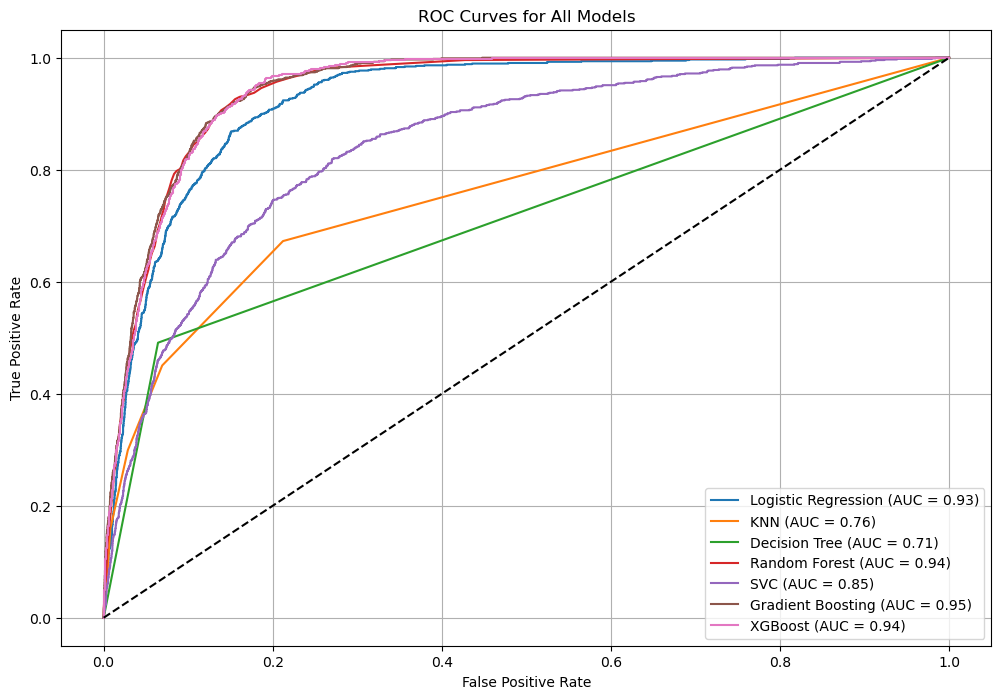

In [ ]:
from sklearn.metrics import roc_curve, auc, RocCurveDisplay

# Dictionary to store models and labels
models = {
    "Logistic Regression": log_model,
    "KNN": knn,
    "Decision Tree": d_tree,
    "Random Forest": rfc,
    "SVC": svc,
    "Gradient Boosting": gbk,
    "XGBoost": xgb
}

plt.figure(figsize=(12, 8))

# Loop to create ROC curves
for name, model in models.items():
    # Use decision_function or predict_proba based on model
    if hasattr(model, "predict_proba"):
        y_score = model.predict_proba(X_test)[:, 1]
    else:  # SVC with no predict_proba
        y_score = model.decision_function(X_test)

    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.2f})")

# Plot formatting
plt.plot([0, 1], [0, 1], 'k--')
plt.title("ROC Curves for All Models")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

## Analyzing The Results:

#### In our classification task, we are dealing with two types of prediction errors:


In [ ]:
- False Positive (FP): The model predicts that the client subscribed to the term deposit, but in reality, the client did not.
-   This is more harmful, as we mistakenly believe the client has already subscribed, and therefore we may not target them in future campaigns—potentially losing a valuable opportunity.

- False Negative (FN): The model predicts the client did not subscribe, but in fact, the client did.
-   This is less harmful, because although we miss the correct prediction now, the client is already onboarded, and we can still identify and work with them in the future.

#### our objective here, is to find the best model by confusion matrix with the lowest False Positive as possible.¶

### Classification Report

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import recall_score

In [ ]:
print('class_report_lr\n',classification_report(y_test,log_pred))

class_report_lr
               precision    recall  f1-score   support

       False       0.92      0.98      0.95      7279
        True       0.66      0.37      0.48       959

    accuracy                           0.90      8238
   macro avg       0.79      0.67      0.71      8238
weighted avg       0.89      0.90      0.89      8238



In [ ]:
print('class_report_knn\n',classification_report(y_test,knn_pred))

class_report_knn
               precision    recall  f1-score   support

       False       0.91      0.97      0.94      7279
        True       0.58      0.30      0.39       959

    accuracy                           0.89      8238
   macro avg       0.75      0.64      0.67      8238
weighted avg       0.87      0.89      0.88      8238



In [ ]:
print('class_report_d_tree\n',classification_report(y_test,d_tree_pred))

class_report_d_tree
               precision    recall  f1-score   support

       False       0.93      0.94      0.93      7279
        True       0.50      0.49      0.50       959

    accuracy                           0.88      8238
   macro avg       0.72      0.71      0.72      8238
weighted avg       0.88      0.88      0.88      8238



In [ ]:
print('class_report_rfc\n',classification_report(y_test,rfc_pred))

class_report_rfc
               precision    recall  f1-score   support

       False       0.94      0.96      0.95      7279
        True       0.66      0.51      0.58       959

    accuracy                           0.91      8238
   macro avg       0.80      0.74      0.76      8238
weighted avg       0.90      0.91      0.91      8238



In [ ]:
print('class_report_svc\n',classification_report(y_test,svc_pred))

class_report_svc
               precision    recall  f1-score   support

       False       0.88      1.00      0.94      7279
        True       0.00      0.00      0.00       959

    accuracy                           0.88      8238
   macro avg       0.44      0.50      0.47      8238
weighted avg       0.78      0.88      0.83      8238



In [ ]:
print('class_report_gbk\n',classification_report(y_test,gbk_pred))

class_report_gbk
               precision    recall  f1-score   support

       False       0.94      0.97      0.95      7279
        True       0.67      0.52      0.59       959

    accuracy                           0.91      8238
   macro avg       0.81      0.74      0.77      8238
weighted avg       0.91      0.91      0.91      8238



In [ ]:
print('class_report_xgb\n',classification_report(y_test,xgb_prd))

class_report_xgb
               precision    recall  f1-score   support

       False       0.94      0.96      0.95      7279
        True       0.64      0.53      0.58       959

    accuracy                           0.91      8238
   macro avg       0.79      0.75      0.77      8238
weighted avg       0.91      0.91      0.91      8238



## Conclusion :

- After the analysis we see that our interest is over decreasing the False Negative means the client SUBSCRIBED to term deposit, but the model said he dont which indicates RECALL. So, we conclude that the model with high RECALL would be best suited for the problem statement.

In [ ]:
pd.DataFrame(data = [recall_score(y_test,log_pred, average='weighted'),
recall_score(y_test,knn_pred, average='weighted'),
recall_score(y_test,svc_pred, average='weighted'),
recall_score(y_test,d_tree_pred, average='weighted'),
recall_score(y_test,rfc_pred, average='weighted'),
recall_score(y_test,xgb_prd, average='weighted'),
recall_score(y_test,gbk_pred, average='weighted')],index=['Logistic','KNN','SVC','DT','RF','XG','GB'],
            columns=['Recall Score']).sort_values(by='Recall Score',ascending=False)

,Recall Score
GB,0.914664
RF,0.911993
XG,0.911143
Logistic,0.904831
KNN,0.893178
DT,0.883952
SVC,0.883588


### The problems we faced:

-  The project faced class imbalance, with far more non-subscribers than subscribers.

-  Models favored the majority class, leading to misleadingly high accuracy.

-  Accuracy was incorrectly used as the main evaluation metric.

-  False positives are more harmful to the business, as we might wrongly assume a client has already subscribed.

-  Confusion matrices and ROC curves were not consistently used for proper evaluation.

-  Threshold tuning to reduce false positives was not explored.

-  Cross-validation was likely missing, reducing the reliability of model performance.